In [1]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
import nibabel as nib


## Part 1

In [2]:
MRI_img=nib.load("sub-0001_space-MNI_T1w.nii")
MRI_img=np.array(MRI_img.dataobj)


## Part 2

In [3]:
def Normalization(img):
    img1=np.copy(img)
    MAX_Value=img1.max()
    MIN_Value=img1.min()
    img1=(img1 - MIN_Value)/(MAX_Value - MIN_Value)
    return img1

        

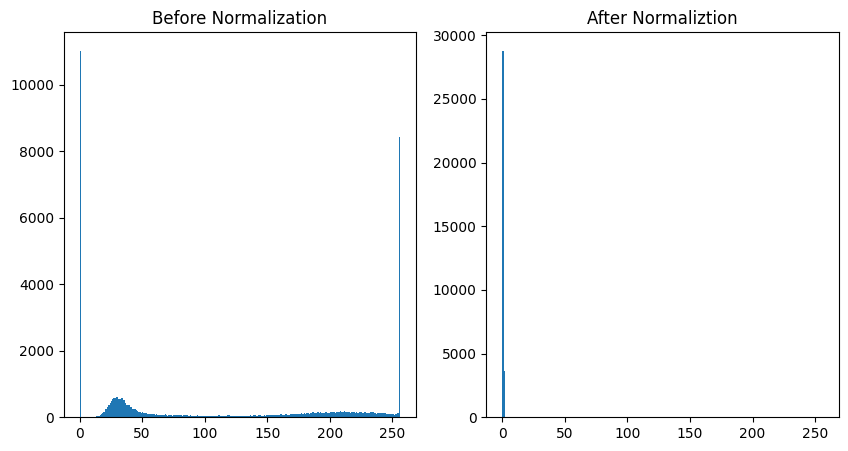

In [4]:
Axial_img=MRI_img[:,:,90]
cv.imwrite("Axial.png",Axial_img)
Axial_img2=cv.imread("Axial.png",0)
Axial_img2_Normalized= Normalization(Axial_img2)
Axial_img2_Normalized=cv.resize(Axial_img2_Normalized,(180,180),cv.INTER_LANCZOS4)
cv.imwrite("Axial_Normalized.png",Axial_img2_Normalized)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(Axial_img2.ravel(),256,[0,256])
plt.title("Before Normalization")
plt.subplot(1,2,2)
plt.hist(Axial_img2_Normalized.ravel(),256,[0,256])
plt.title("After Normaliztion")
plt.show()


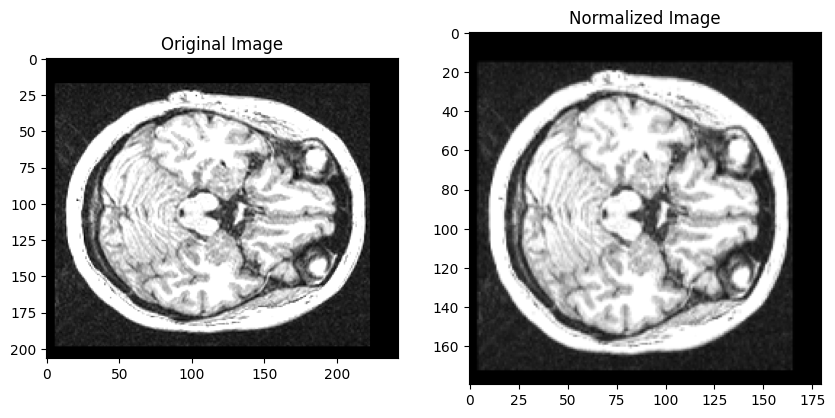

In [5]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(Axial_img2,cmap='gray')
plt.title("Original Image")
plt.subplot(1,2,2)
plt.imshow(Axial_img2_Normalized,cmap='gray')
plt.title("Normalized Image")
plt.show()

## Part 3

In this section, I've written two functions for adding S&P noise. One function adds random numbers of noise to the image, while the other adds 40 percent of the block size number of noise to the image.
please pick just one section and then countinue.

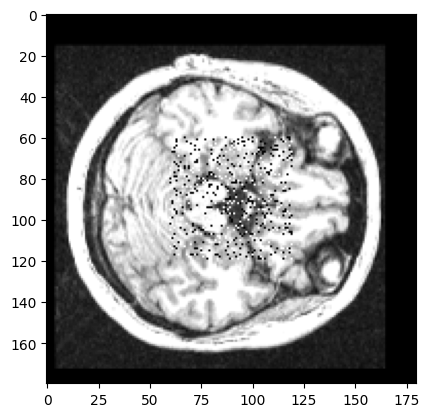

In [6]:
## Randon Number of noise
def Salt_Pepper_Noise(img, height, width, x, y):
    img1 = img.copy()
    x_start = int(x - height/2)
    x_end = int(x + height/2)
    y_start = int(y - width/2)
    y_end = int(y + width/2)
    Noise = img1[x_start:x_end, y_start:y_end] 
    Salt_number = np.random.randint(100, 500)
    Salt_indices = np.unravel_index(np.random.choice(height * width, Salt_number), Noise.shape)
    Noise[Salt_indices] = 1
    Pepper_number = np.random.randint(100, 500)
    Pepper_indices = np.unravel_index(np.random.choice(height * width, Pepper_number), Noise.shape)
    Noise[Pepper_indices] = 0
    img1[x_start:x_end, y_start:y_end] = Noise
    return img1

Axial_Noisy = Salt_Pepper_Noise(Axial_img2_Normalized,60,60,90,90)
plt.imshow(Axial_Noisy,cmap='gray')
plt.show()

## Part 4

In [7]:
def my_var(img,height,width,x,y):
    x_start = int(x)
    x_end = int(x + height)
    y_start = int(y)
    y_end = int(y + width)
    return np.var(img[x_start:x_end,y_start:y_end])

## Part 5

In [8]:
var_list = []
i = 0
block_size = 60
x = 0
coor_List=[];
while x < 180:
    y = 0
    while y < 180:
        var_list.append( my_var(Axial_Noisy, block_size, block_size, x, y))
        coor_List.append([x,y])
        y += (block_size)
    x += (block_size +1)

var_list = np.array(var_list) 
maximum_var = var_list.max()
index_max = np.unravel_index(var_list.argmax(), var_list.shape)
max_var_index = index_max[0]
print("Maximum variance:", maximum_var)
print("Index of maximum variance:", index_max)
print("Coordinates of maximum variance:", coor_List[max_var_index])

Maximum variance: 0.17568504309853689
Index of maximum variance: (1,)
Coordinates of maximum variance: [0, 60]


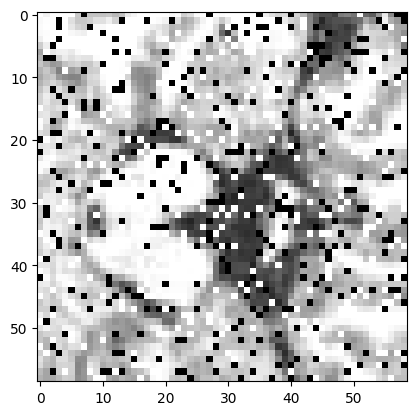

In [9]:
plt.imshow(Axial_Noisy[60:119, 60:119],cmap='gray')

## Part 6

In [10]:
def convolution(f, w, kernel_size):
    w=w[::-1,::-1]
    Filtered_Image = np.zeros(np.shape(f))
    f = np.pad(f,1)
    for i in range(f.shape[0]-kernel_size+1):
        for j in range(f.shape[1]-kernel_size+1):
            Filtered_Image[i, j] = np.sum(f[i:i+kernel_size, j:j+kernel_size]*w)
    return Filtered_Image

def img_filter(img, filter_name, kernel_size=3):
    img1=img.copy()
    if filter_name == 'Mean':
        
        filter_matrix = np.ones((kernel_size,kernel_size))/kernel_size**2 
        Filtered_Image = convolution(img1, filter_matrix, kernel_size)

    elif filter_name == 'Median':
        
        Filtered_Image = np.zeros(np.shape(img1))
        img1 = np.pad(img1,1)
        for i in range(img1.shape[0]-kernel_size+1):
            for j in range(img1.shape[1]-kernel_size+1):
                Filtered_Image[i, j] = np.median(img1[i:i+kernel_size, j:j+kernel_size])  

    elif filter_name == 'Gaussian':
        filter_matrix = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])/16 
        Filtered_Image = convolution(img1, filter_matrix, kernel_size )                        
    return Filtered_Image

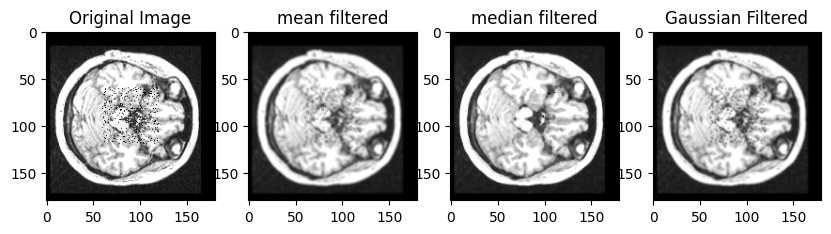

In [11]:
mean_filtered = img_filter(Axial_Noisy,'Mean')
median_filtered = img_filter(Axial_Noisy,'Median')
gaussian_filtered = img_filter(Axial_Noisy,'Gaussian')

plt.figure(figsize=(10,10))
plt.subplot(1,4,1)
plt.imshow(Axial_Noisy,cmap='gray')
plt.title("Original Image")
plt.subplot(1,4,2)
plt.imshow( mean_filtered,cmap='gray')
plt.title("mean filtered")
plt.subplot(1,4,3)
plt.imshow(median_filtered,cmap='gray')
plt.title("median filtered")
plt.subplot(1,4,4)
plt.imshow(gaussian_filtered,cmap='gray')
plt.title("Gaussian Filtered")
plt.show()

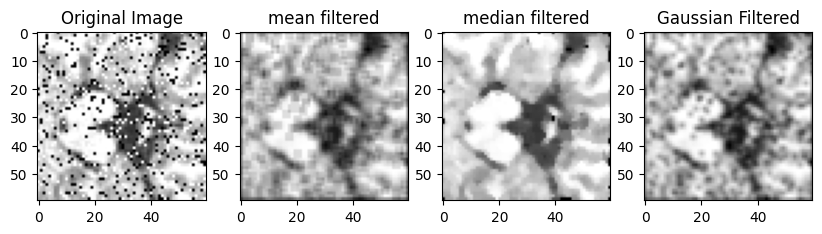

In [12]:
mean_filtered_SP = img_filter(Axial_Noisy[60:120,60:120],'Mean')
median_filtered_SP = img_filter(Axial_Noisy[60:120,60:120],'Median')
gaussian_filtered_SP = img_filter(Axial_Noisy[60:120,60:120],'Gaussian')

plt.figure(figsize=(10,10))
plt.subplot(1,4,1)
plt.imshow(Axial_Noisy[60:120,60:120],cmap='gray')
plt.title("Original Image")
plt.subplot(1,4,2)
plt.imshow( mean_filtered_SP,cmap='gray')
plt.title("mean filtered")
plt.subplot(1,4,3)
plt.imshow(median_filtered_SP,cmap='gray')
plt.title("median filtered")
plt.subplot(1,4,4)
plt.imshow(gaussian_filtered_SP,cmap='gray')
plt.title("Gaussian Filtered")
plt.show()

In [13]:
def median_absolute_error(image1, image2):
    flat_image1 = image1.flatten()
    flat_image2 = image2.flatten()
    absolute_errors = np.abs(flat_image1 - flat_image2)
    medae = np.median(absolute_errors)
    return medae

def SSIM(img1, img2):
    C1 = (0.01 * 255)**2
    C2 = (0.03 * 255)**2

    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)
    kernel = cv.getGaussianKernel(11, 1.5)
    window = np.outer(kernel, kernel.transpose())

    mu1 = cv.filter2D(img1, -1, window)[5:-5, 5:-5]  
    mu2 = cv.filter2D(img2, -1, window)[5:-5, 5:-5]
    mu1_sq = mu1**2
    mu2_sq = mu2**2
    mu1_mu2 = mu1 * mu2
    sigma1_sq = cv.filter2D(img1**2, -1, window)[5:-5, 5:-5] - mu1_sq
    sigma2_sq = cv.filter2D(img2**2, -1, window)[5:-5, 5:-5] - mu2_sq
    sigma12 = cv.filter2D(img1 * img2, -1, window)[5:-5, 5:-5] - mu1_mu2

    ssim_map = ((2 * mu1_mu2 + C1) * (2 * sigma12 + C2)) / ((mu1_sq + mu2_sq + C1) *(sigma1_sq + sigma2_sq + C2))
    return ssim_map.mean()

ssim_mean = SSIM(Axial_Noisy, mean_filtered)
mae_mean = median_absolute_error(Axial_Noisy, mean_filtered)

ssim_median = SSIM(Axial_Noisy, median_filtered)
mae_median = median_absolute_error(Axial_Noisy, median_filtered)

ssim_gaussian = SSIM(Axial_Noisy, gaussian_filtered)
mae_gaussian = median_absolute_error(Axial_Noisy, gaussian_filtered)

print("SSIM for Mean Filtered Image:", ssim_mean)
print("MAD for Mean Filtered Image:", mae_mean)

print("SSIM for Median Filtered Image:", ssim_median)
print("MAD for Median Filtered Image:", mae_median)

print("SSIM for Gaussian Filtered Image:", ssim_gaussian)
print("MAD for Gaussian Filtered Image:", mae_gaussian)

SSIM for Mean Filtered Image: 0.9998175058222879
MAD for Mean Filtered Image: 0.01741516884531618
SSIM for Median Filtered Image: 0.9997819532437491
MAD for Median Filtered Image: 0.0012561274509799991
SSIM for Gaussian Filtered Image: 0.9998761542655706
MAD for Gaussian Filtered Image: 0.013640548406862699


In [14]:
ssim_mean = SSIM(Axial_Noisy[60:120,60:120], mean_filtered_SP)
mae_mean = median_absolute_error(Axial_Noisy[60:120,60:120], mean_filtered_SP)

ssim_median = SSIM(Axial_Noisy[60:120,60:120], median_filtered_SP)
mae_median = median_absolute_error(Axial_Noisy[60:120,60:120], median_filtered_SP)

ssim_gaussian = SSIM(Axial_Noisy[60:120,60:120], gaussian_filtered_SP)
mae_gaussian = median_absolute_error(Axial_Noisy[60:120,60:120], gaussian_filtered_SP)

print("SSIM for Mean Filtered Image:", ssim_mean)
print("MAD for Mean Filtered Image:", mae_mean)

print("SSIM for Median Filtered Image:", ssim_median)
print("MAD for Median Filtered Image:", mae_median)

print("SSIM for Gaussian Filtered Image:", ssim_gaussian)
print("MAD for Gaussian Filtered Image:", mae_gaussian)

SSIM for Mean Filtered Image: 0.999084154382074
MAD for Mean Filtered Image: 0.09439910130718879
SSIM for Median Filtered Image: 0.9986300245129107
MAD for Median Filtered Image: 0.029852941176470416
SSIM for Gaussian Filtered Image: 0.9993471664943158
MAD for Gaussian Filtered Image: 0.07397993259803903
